# Mecánica Celeste: teoría, algoritmos y problemas
# Por Jorge I. Zuluaga

En estos cuadernos hemos compilado la mayoría de los códigos que vienen con el libro [**Mecánica Celeste: teoría, algoritmos y problemas**](https://www.libreriadelau.com/bw-mecanica-celeste-teoria-algoritmos-y-problemas-u-de-antioquia-fisica/p). En cada cuaderno encontrará códigos de secciones o capítulos enteros. Para explicaciones detalladas de lo que hacen los códigos refiérase a la sección o capítulo respectivo. Para mayor comodidad puede leer o ejecutar este cuaderno usando `Google Colab`.

<a target="_blank" href="https://colab.research.google.com/github/seap-udea/pymcel/blob/main/ejemplos/cuadernos-libro/mcel_zuluaga-ncuerpos_general.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Algorítmos del Problema de los N cuerpos General

### Instalación e importación

Si está usando este cuaderno en `Colab` debería instalar `pymcel` antes de comenzar: 

In [16]:
!pip install -Uq pymcel

In [1]:
# Este código se usa solamente para desarrollar estos cuadernos pero es inocuo en otros contextos
%load_ext autoreload 
%autoreload 2

### Momentum angular en el problema de los N cuerpos 

Descarga los kernels de `SPICE`:

In [12]:
import pymcel as pc
pc.descarga_kernels()

Paquete pymcel cargado. Versión: 0.6.0
Descargando kernel 'de430.bsp' en 'pymcel/'...
El kernel 'de430.bsp' ya fue descargado
Descargando kernel 'de430_tech-comments.txt' en 'pymcel/'...
El kernel 'de430_tech-comments.txt' ya fue descargado
Descargando kernel 'latest_leapseconds.tls' en 'pymcel/'...
El kernel 'latest_leapseconds.tls' ya fue descargado
Descargando kernel 'naif0012.tls' en 'pymcel/'...
El kernel 'naif0012.tls' ya fue descargado
Descargando kernel 'earth_latest_high_prec.bpc' en 'pymcel/'...
El kernel 'earth_latest_high_prec.bpc' ya fue descargado
Descargando kernel 'earth_fixed.tf' en 'pymcel/'...
El kernel 'earth_fixed.tf' ya fue descargado
Descargando kernel 'gm_de431.tpc' en 'pymcel/'...
El kernel 'gm_de431.tpc' ya fue descargado
Descargando kernel 'pck00011.tpc' en 'pymcel/'...
El kernel 'pck00011.tpc' ya fue descargado
Descargando kernel 'de430.tpc' en 'pymcel/'...
El kernel 'de430.tpc' ya fue descargado


Obtener posiciones y velocidades del Sol y de Júpiter para una época dada (et $= 0$, es decir `2000-01-01 12:00:00`)

In [13]:
import spiceypy as spy

#Asumimos un tiempo cualquiera, en este caso t=J2000.0
tef=0

#Carga kernels con posiciones (bsp) y masas (tpc)
spy.furnsh('pymcel/data/de430.bsp')
spy.furnsh('pymcel/data/de430.tpc')

#Parámetro gravitacional, posiciones y velocidades de los cuerpos
musol=spy.bodvrd("SUN","GM",1)[1][0]
sol,tluz=spy.spkezr("SUN",tef,
                    "ECLIPJ2000","None","SSB")
rsol=sol[:3]
vsol=sol[3:]
mujupiter=spy.bodvrd("JUPITER_BARYCENTER","GM",1)[1][0]
jupiter,tluz=spy.spkezr("JUPITER_BARYCENTER",tef,
                        "ECLIPJ2000","None","SSB")
rjupiter=jupiter[:3]
vjupiter=jupiter[3:]

print(f"Sol:")
print(f"\tmu = {musol} km^3/s^2")
print(f"\tPosición = {rsol} km")
print(f"\tVelocidad = {vsol} km/s")
print(f"Jupiter:")
print(f"\tmu = {mujupiter} km^3/s^2")
print(f"\tPosición = {rjupiter} km")
print(f"\tVelocidad = {vjupiter} km/s")

Sol:
	mu = 132712440041.9394 km^3/s^2
	Posición = [-1067598.50226456  -418234.39327422    30837.61810502] km
	Velocidad = [ 0.00931257 -0.01282475 -0.00016333] km/s
Jupiter:
	mu = 126712764.7999999 km^3/s^2
	Posición = [ 5.97499980e+08  4.39186501e+08 -1.51960586e+07] km
	Velocidad = [-7.90052522 11.14330827  0.13069904] km/s


Calculemos el momentum angular del sistema:

In [15]:
#Constante de gravitación universal:
G=6.67e-20 # km^3 / kg s^2

#Momentum angular total
from numpy import cross
L=(musol/G)*cross(rsol,vsol)+(mujupiter/G)*cross(rjupiter,vjupiter)

print(f"L = {L} kg m^2/s^2")

L = [4.31661898e+35 7.99455257e+34 1.92754426e+37] kg m^2/s^2


Calculemos ahora el ángulo que forma este vector respecto al plano de referencia (`ECLIPJ2000`):

In [16]:
from numpy import arccos
from numpy.linalg import norm

i=arccos(L[2]/norm(L))

from numpy import pi
grados=i*180/pi
minutos=60*(grados-int(grados))
segundos=60*(minutos-int(minutos))
print(f"i = {grados} grados")
print(f"  = {int(grados)}:{int(minutos)}:{int(segundos)}")

i = 1.3046988768626038 grados
  = 1:18:16


### Energía en el problema de los N cuerpos

Energía del sistema Tierra-Luna:

In [18]:
import spiceypy as spy

#Constante de gravitación universal 
G=6.67e-20 # km^3 / kg s^2

#Asumimos un tiempo cualquiera, en este caso t=J2000.0
tef=0

#Carga kernels con posiciones (bsp) y masas (tpc)
spy.furnsh('pymcel/data/de430.bsp')
spy.furnsh('pymcel/data/de430.tpc')

#Parámetro gravitacional, posiciones y velocidades
mutierra=spy.bodvrd("EARTH","GM",1)[1][0]
tierra,tluz=spy.spkezr("EARTH",tef,
                       "ECLIPJ2000","None","EARTH_BARYCENTER")
rtierra=tierra[:3]
vtierra=tierra[3:]

muluna=spy.bodvrd("MOON","GM",1)[1][0]
luna,tluz=spy.spkezr("MOON",tef,
                     "ECLIPJ2000","None","EARTH_BARYCENTER")
rluna=luna[:3]
vluna=luna[3:]

#Masas
mtierra=mutierra/G
mluna=muluna/G

#Energía potencial
from numpy.linalg import norm
U=-G*mluna*mtierra/norm(rtierra-rluna)

#Energía cinética
K=0.5*mutierra*norm(vtierra)**2+0.5*mluna*norm(vluna)**2

#Energía mecánica total
E=K+U

print(f"Energía potencial U: {U} kg km^2/s^2")
print(f"Energía cinética K: {K} kg km^2/s^2")
print(f"Energía mecánica total E: {E} kg km^2/s^2")

Energía potencial U: -7.369786503549795e+22 kg km^2/s^2
Energía cinética K: 3.4021556025880696e+22 kg km^2/s^2
Energía mecánica total E: -3.967630900961725e+22 kg km^2/s^2


### El virial del Sistema Solar

Obtenemos las posiciones y velocidades del Sol, Júpiter y Saturno:

In [19]:
#Constante de gravitación universal 
G=6.67e-20 # km^3 / kg s^2

#Carga kernels con posiciones (bsp) y masas (tpc)
import spiceypy as spy
spy.furnsh('pymcel/data/de430.bsp')
spy.furnsh('pymcel/data/de430.tpc')

#Número de valores de tiempo
Nt=100

#Lista de tiempos en los que calcularemos el virial:
#Tomamos 60 años que es aprox. 2 veces el período de Saturno
from numpy import linspace
tefs=linspace(0.0,60*356.25*86400,Nt)

#Masas de los cuerpos
msol=spy.bodvrd("SUN","GM",1)[1][0]/G
mjupiter=spy.bodvrd("JUPITER_BARYCENTER","GM",1)[1][0]/G
msaturno=spy.bodvrd("SATURN_BARYCENTER","GM",1)[1][0]/G

Vamos a calcular ahora la energía cinética, potencial y total para el sistema en el tiempo:

In [21]:
from numpy.linalg import norm
Ks=[]
Us=[]
Es=[]
for tef in tefs:
    #Posiciones, velocidades, energías cinéticas
    sol,tluz=spy.spkezr("SUN",tef,
                        "ECLIPJ2000","None","SSB")
    rsol=sol[:3]
    vsol=sol[3:]
    K_sol=0.5*msol*norm(vsol)**2
    
    jupiter,tluz=spy.spkezr("JUPITER_BARYCENTER",tef,
                            "ECLIPJ2000","None","SSB")
    rjupiter=jupiter[:3]
    vjupiter=jupiter[3:]
    K_jup=0.5*mjupiter*norm(vjupiter)**2
    
    saturno,tluz=spy.spkezr("SATURN_BARYCENTER",tef,
                            "ECLIPJ2000","None","SSB")

    rsaturno=saturno[:3]
    vsaturno=saturno[3:]
    K_sat=0.5*msaturno*norm(vsaturno)**2

    #Distancias entre los cuerpos
    r_jup_sol=norm(rjupiter-rsol)
    r_sat_sol=norm(rsaturno-rsol)
    r_jup_sat=norm(rjupiter-rsaturno)
    
    #Energia potencial
    U_jup_sol=-G*mjupiter*msol/r_jup_sol
    U_sat_sol=-G*msaturno*msol/r_sat_sol
    U_jup_sat=-G*mjupiter*msaturno/r_jup_sat

    #Energía cinética, potencial y mecánica
    Ktot=K_sol+K_jup+K_sat
    U=U_jup_sol+U_sat_sol+U_jup_sat
    E=Ktot+U
    
    #Guarda valores en la lista
    Ks+=[Ktot]
    Us+=[abs(U)]
    Es+=[abs(E)]

from numpy import mean
print(f"<K> = {mean(Ks)} kg km^2/s^2")
print(f"<U>/2 = -{mean(Us)/2} kg km^2/s^2")
print(f"E = -{mean(Es)} kg km^2/s^2")

<K> = 1.883839013581885e+29 kg km^2/s^2
<U>/2 = -1.8840677890439464e+29 kg km^2/s^2
E = -1.8842965645060087e+29 kg km^2/s^2


Una gráfica de las energías:

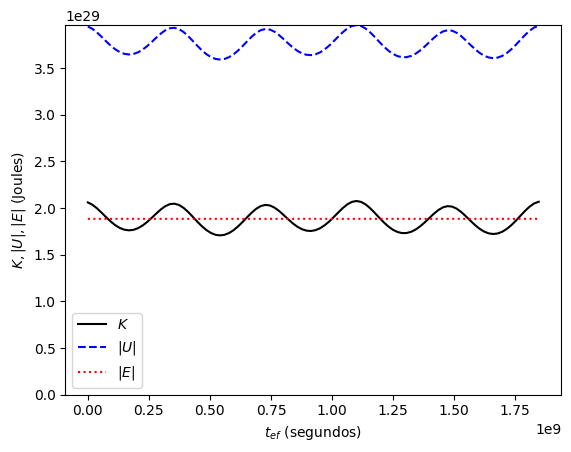

In [22]:
from numpy import max
import matplotlib.pyplot as plt
plt.plot(tefs,Ks,'k-',label="$K$")
plt.plot(tefs,Us,'b--',label="$|U|$")
plt.plot(tefs,Es,'r:',label="$|E|$")

plt.legend()
plt.ylim(0,max(Us));
plt.xlabel("$t_{ef}$ (segundos)");
plt.ylabel("$K,|U|,|E|$ (Joules)");

### La masa de un cúmulo de galaxias

Datos para el cúmulo de Coma estimada a partir del teorema del virial:

In [25]:
#Constante gravitacional
G=6.67e-20 # km^3 / kg s^2

#Parsec y año-luz
pc=3.26
al=9.46e12 #km 

#Radio del viral
Rvir=2e6*pc*al

#Dispersión de velocidades
v2=1000**2

#Masa del virial del cúmulo
Mvir=5*Rvir*v2/(3*G)

print(f"Masa del virial del cúmulo de Coma:\n{Mvir} kg")

Masa del virial del cúmulo de Coma:
1.5412093953023487e+45 kg


<hr/>

Para explorar más cuadernos del libro vaya al [repositorio de en GitHub](https://github.com/seap-udea/pymcel/tree/main/ejemplos/cuadernos-libro)